# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  2319k      0  0:00:39  0:00:39 --:--:-- 3147k
total 120
-rw-r--r-- 1 ahmedblidia ahmedblidia 23622 Jun 30 10:40 image_denoising.ipynb
-rw-r--r-- 1 ahmedblidia ahmedblidia   122 Jun 30 09:05 image_denoising.ipynb:Zone.Identifier
-rw-r--r-- 1 ahmedblidia ahmedblidia 32110 Jun 30 10:07 my.png
drwx------ 2 ahmedblidia ahmedblidia 57344 Jun  9 15:06 paintings
-rw-r--r-- 1 ahmedblidia ahmedblidia     0 Jun 29 09:19 README.md
drwxr-xr-x 2 ahmedblidia ahmedblidia  4096 Jun 30 09:25 tests


In [1]:
import glob
dataset_paths = glob.glob("./paintings/*.jpg")


dataset_paths

['./paintings/Kazimir_Malevich_13.jpg',
 './paintings/Jan_van_Eyck_15.jpg',
 './paintings/Albrecht_Duâ\x95\xa0Ãªrer_34.jpg',
 './paintings/Edgar_Degas_271.jpg',
 './paintings/Titian_45.jpg',
 './paintings/Paul_Gauguin_65.jpg',
 './paintings/Andy_Warhol_89.jpg',
 './paintings/Pierre-Auguste_Renoir_151.jpg',
 './paintings/Pablo_Picasso_120.jpg',
 './paintings/Vincent_van_Gogh_305.jpg',
 './paintings/Pablo_Picasso_186.jpg',
 './paintings/Pablo_Picasso_63.jpg',
 './paintings/Albrecht_DuÌ\x88rer_244.jpg',
 './paintings/Frida_Kahlo_87.jpg',
 './paintings/Vincent_van_Gogh_558.jpg',
 './paintings/Pablo_Picasso_14.jpg',
 './paintings/Rene_Magritte_94.jpg',
 './paintings/El_Greco_63.jpg',
 './paintings/Gustav_Klimt_104.jpg',
 './paintings/Paul_Gauguin_12.jpg',
 './paintings/Vasiliy_Kandinskiy_57.jpg',
 './paintings/Edgar_Degas_228.jpg',
 './paintings/Marc_Chagall_101.jpg',
 './paintings/Pierre-Auguste_Renoir_57.jpg',
 './paintings/Leonardo_da_Vinci_50.jpg',
 './paintings/Rene_Magritte_50.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

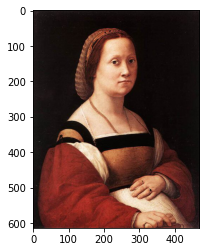

In [2]:
# YOUR CODE HERE
from PIL import Image
from matplotlib.pyplot import imshow

filename=dataset_paths[53]

im=Image.open(filename)

imshow(im)



❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [3]:
# YOUR CODE HERE
img_shape=im.size
img_dim=2




❓ **What was in the image above?**

In [4]:
img_shape = img_shape
img_dim = img_dim


# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [5]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)


result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [6]:
# YOUR CODE HERE
dataset_images=[]

for i in range(len(dataset_paths)):
    filename=dataset_paths[i]
    
    dataset_images.append(Image.open(filename))

In [7]:
len(dataset_images)



1085

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

In [8]:
import numpy as np
dataset_images=[np.array(i) for i in dataset_images]


dataset_images=np.array(dataset_images)



dataset_images



array([array([[[154, 156, 132],
        [159, 161, 137],
        [184, 186, 162],
        ...,
        [ 86, 102, 118],
        [ 51,  66,  85],
        [ 84, 101, 119]],

       [[150, 152, 128],
        [158, 160, 136],
        [187, 191, 166],
        ...,
        [ 65,  81,  96],
        [ 80,  96, 112],
        [ 61,  76,  95]],

       [[150, 154, 131],
        [119, 123, 100],
        [110, 114,  91],
        ...,
        [ 74,  87, 103],
        [ 91, 104, 120],
        [ 52,  65,  82]],

       ...,

       [[213, 189, 163],
        [250, 229, 200],
        [181, 164, 134],
        ...,
        [155, 138, 128],
        [150, 132, 128],
        [164, 146, 146]],

       [[200, 176, 152],
        [202, 181, 154],
        [195, 178, 150],
        ...,
        [166, 150, 137],
        [157, 139, 135],
        [166, 148, 148]],

       [[223, 199, 175],
        [227, 205, 181],
        [240, 223, 195],
        ...,
        [183, 167, 152],
        [178, 161, 154],
        [195, 177

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [9]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
shape=[len(dataset_images[i].shape) for i in range(len(dataset_images))]

nb_dim=set(shape)

print("they don't have all the same dimensions",nb_dim," because some of them are black and white")











they don't have all the same dimensions {2, 3}  because some of them are black and white


👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [10]:
from  tqdm import tqdm
import numpy as np





dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]





set([x.ndim for x in dataset_images])


100%|██████████| 1085/1085 [00:00<00:00, 1344.00it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [11]:
# YOUR CODE HERE
"they dont have the same shape"

from tensorflow.image import resize


dataset_resized=[np.array(resize(dataset_images[i], [120,100])) for i in range(len(dataset_images))]





❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [12]:
# YOUR CODE HERE
dataset_scaled=np.array([dataset_resized[i][:,:,:]/dataset_resized[i][:,:,:].max() for i in range(len(dataset_resized))])



In [13]:
dataset_scaled.shape




(1085, 120, 100, 3)

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [14]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        
        loc=0,
        scale=NOISE_LEVEL,
        
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

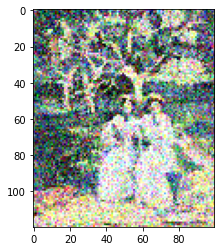

In [15]:
# YOUR CODE HERE

data=dataset_noisy[0]
plt.imshow(data)


❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [16]:
# YOUR CODE HERE
X=dataset_noisy
y=dataset_scaled
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)


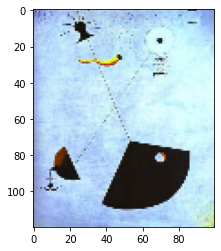

In [17]:
data=Y_train[20]

plt.imshow(data)

In [18]:
from nbresult import ChallengeResult
result = ChallengeResult(
    
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [156]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose_26 (Conv2DT (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_27 (Conv2DT (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [187]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY

encoder = Sequential(name='encoder')
encoder.add(layers.Conv2D(filters=3, kernel_size=3,activation="relu", padding="same",input_shape=(120, 100, 3)))
#encoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
#encoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, padding="same", activation="relu"))
encoder.add(layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
encoder.add(layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
encoder.add(layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))
encoder.add(layers.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu"))



#encoder.add(layers.MaxPool2D(pool_size=(16,16)))











encoder.add(layers.Flatten())
#encoder.add(layers.Dense(6000, activation='relu'))

encoder.summary()


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 120, 100, 3)       84        
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 60, 50, 32)        896       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 30, 25, 16)        4624      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 30, 25, 16)        2320      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 30, 25, 8)         1160      
_________________________________________________________________
flatten_20 (Flatten)         (None, 6000)              0         
Total params: 9,084
Trainable params: 9,084
Non-trainable params: 0
_________________________________________________________

👉 **Test your encoder below**

In [188]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model



x = layers.Input(shape=(120, 100, 3))






autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              9084      
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 15,759
Trainable params: 15,759
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.

- Store the result under `score_baseline`

In [145]:
# YOUR CODE HERE
from sklearn.metrics import mean_absolute_error
def mse(Y_true,Y_pred):
    
    return mean_absolute_error([i.reshape(120*100*3) for i in Y_true],[i.reshape(120*100*3) for i in Y_pred])

score_baseline=mse(X,y)

score_baseline


    


0.14051467

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [209]:
# YOUR CODE HERE
from tensorflow.keras.losses import MeanAbsoluteError as mse
def scheduler(epoch, lr):
  if epoch < 10:
    return lr* 1*tf.math.exp(-0.1)
  else:
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
autoencoder.compile(optimizer="Adam",loss='MeanAbsoluteError')



autoencoder.fit(X_train,Y_train,epochs=10,callbacks=[callback],validation_data=(X_test,Y_test))












Epoch 1/10
28/28 [==============================] - 26s 925ms/step - loss: 0.1493 - val_loss: 0.1088
Epoch 2/10
28/28 [==============================] - 29s 1s/step - loss: 0.1028 - val_loss: 0.1001
Epoch 3/10
28/28 [==============================] - 26s 929ms/step - loss: 0.0961 - val_loss: 0.0987
Epoch 4/10
28/28 [==============================] - 26s 922ms/step - loss: 0.0947 - val_loss: 0.0985
Epoch 5/10
28/28 [==============================] - 28s 988ms/step - loss: 0.0943 - val_loss: 0.0978
Epoch 6/10
28/28 [==============================] - 30s 1s/step - loss: 0.0950 - val_loss: 0.0973
Epoch 7/10
28/28 [==============================] - 27s 971ms/step - loss: 0.0942 - val_loss: 0.0966
Epoch 8/10
28/28 [==============================] - 25s 889ms/step - loss: 0.0944 - val_loss: 0.0963
Epoch 9/10
28/28 [==============================] - 26s 919ms/step - loss: 0.0928 - val_loss: 0.0959
Epoch 10/10
28/28 [==============================] - 25s 883ms/step - loss: 0.0939 - val_loss: 0.

❓ **Plot your training and validation loss at each epoch using the cell below**

In [210]:
history=autoencoder.history.history


history


#Test_history=autoencoder.evaluate(X_test,Y_test)



{'loss': [0.1294168084859848,
  0.1014503613114357,
  0.09672529995441437,
  0.09608069807291031,
  0.09560912847518921,
  0.0949450209736824,
  0.09468958526849747,
  0.09433643519878387,
  0.09390640258789062,
  0.09339167922735214],
 'val_loss': [0.10881280899047852,
  0.1000594049692154,
  0.09871038794517517,
  0.09850452840328217,
  0.09783341735601425,
  0.09728043526411057,
  0.09660932421684265,
  0.09630309790372849,
  0.09585639834403992,
  0.09555615484714508],
 'lr': [0.00090483745,
  0.0008187308,
  0.0007408183,
  0.0006703201,
  0.00060653075,
  0.00054881175,
  0.0004965854,
  0.00044932903,
  0.0004065697,
  0.0003678795]}

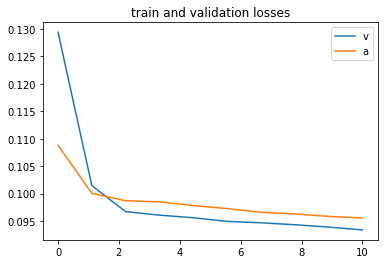

In [211]:
# Plot below your train/val loss history
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,len(history['loss']),len(history['loss'])),history['loss'])
plt.legend("train") 


plt.plot(np.linspace(0,len(history['val_loss']),len(history['val_loss'])),history['val_loss'])
plt.legend("validation") 


plt.title("train and validation losses")
# Run also this code to save figure as jpg in path below (it's your job to ensure it works)

fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [212]:
# YOUR CODE HERE


Y_pred=autoencoder.predict(X)
Y_pred






array([[[[0.46354458, 0.4145901 , 0.40011582],
         [0.41894567, 0.4014864 , 0.37980434],
         [0.41321805, 0.3738479 , 0.35682476],
         ...,
         [0.3527274 , 0.32152992, 0.30925933],
         [0.3790648 , 0.34872973, 0.32529962],
         [0.43613106, 0.41833395, 0.3822674 ]],

        [[0.43088296, 0.3865126 , 0.3688553 ],
         [0.38634855, 0.36554807, 0.3206547 ],
         [0.36513495, 0.34070408, 0.3176142 ],
         ...,
         [0.3195774 , 0.3088762 , 0.25575548],
         [0.33531174, 0.31734458, 0.28302324],
         [0.37922633, 0.37873292, 0.33744586]],

        [[0.420243  , 0.35828522, 0.33863708],
         [0.3580257 , 0.32743365, 0.30621874],
         [0.33044642, 0.2948138 , 0.2651015 ],
         ...,
         [0.28044158, 0.25778604, 0.22136712],
         [0.29706627, 0.26239032, 0.23815283],
         [0.35445386, 0.34691477, 0.31791824]],

        ...,

        [[0.5977138 , 0.5622842 , 0.52226365],
         [0.7035111 , 0.65243566, 0.6007853 ]

In [213]:
def mse(Y_true,Y_pred):
    
    return mean_absolute_error([i.reshape(120*100*3) for i in Y_true],[i.reshape(120*100*3) for i in Y_pred])

score_test=mse(Y_pred,X)



score_test







0.16802816

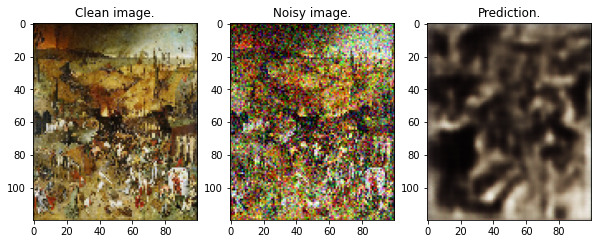

In [214]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 20




fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")


axs[1].imshow(X_test[idx])

axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")



# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [215]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    
    
    
    
    
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()